# **GRU Exercise**

## Import libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [7]:
df= pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Data Exploration



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [10]:
df.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


## Feature Engineering (if needed)



In [11]:
df = df.drop('ID', axis=1)

In [12]:
df['DateTime'] = pd.to_datetime(df['DateTime']) #convert date time type

In [13]:
df['Year'] = df['DateTime'].dt.year #extract year as new feature

## Exploratory Data Analysis


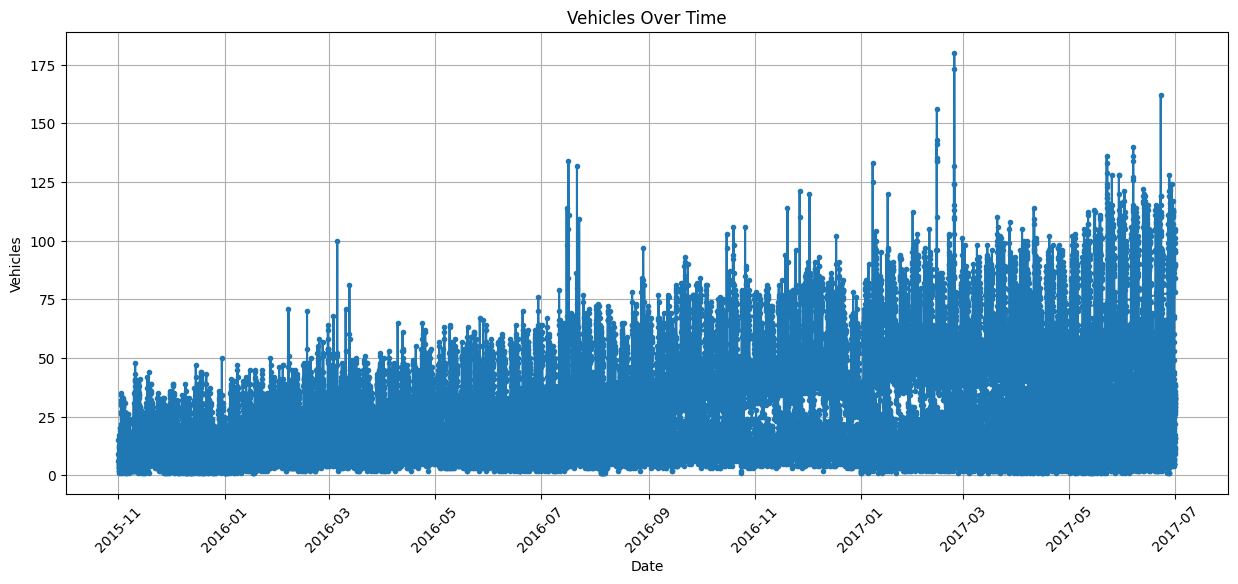

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.title('Vehicles Over Time')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## split into train and test sets

In [22]:

from sklearn.preprocessing import MinMaxScaler

# We will use the 'Close' column as our target variable
data = df[['Vehicles']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60  # Using 60 days of data to predict the next day

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

In [23]:
# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [25]:
# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Fitting The Model



In [26]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 112s 90ms/step - loss: 0.0019 - val_loss: 9.2425e-04
Epoch 2/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 107s 89ms/step - loss: 7.3850e-04 - val_loss: 9.0451e-04
Epoch 3/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 141s 88ms/step - loss: 7.0395e-04 - val_loss: 8.6210e-04
Epoch 4/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 130s 78ms/step - loss: 6.3918e-04 - val_loss: 7.8665e-04
Epoch 5/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 140s 77ms/step - loss: 6.2414e-04 - val_loss: 7.6864e-04
Epoch 6/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 144s 78ms/step - loss: 5.9853e-04 - val_loss: 7.5411e-04
Epoch 7/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 139s 76ms/step - loss: 5.7240e-04 - val_loss: 7.6026e-04
Epoch 8/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - loss: 5.4133e-04 - val_loss: 8.2803e-04
Epoch 9/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 143s 78ms/step - loss: 5.9477e-04 - val_loss: 7.3738e-04
Epoch 10/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - loss: 5.4283e-04 - val_loss: 7.4874e-04


## Make preductuion and evaluatuin matrix.

In [27]:
# Make predictions
y_predict = model.predict(X_test)

# Inverse transform to get actual stock prices
y_predict = scaler.inverse_transform(y_predict.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


## Visualize the result

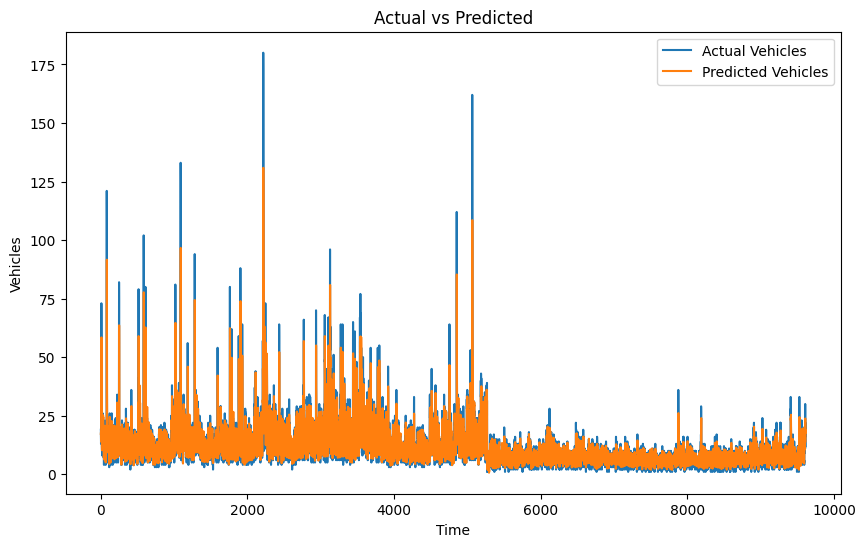

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual,  label='Actual Vehicles')
plt.plot(y_predict, label='Predicted Vehicles')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# **Well done** :)